## Bike-sharing Assignment

Boombikes is a bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
- Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

To get this insights, we will build a model to represent the demand for shared bikes with the available independent variables.

### Reading and Understanding data

In [1]:
#importing the required libraries and setting some formatting options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.width', 400)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams['figure.figsize'] = (15, 8)
sns.set(style="dark")
sns.set_palette('tab10')

In [2]:
#reading the data and checking it's shape and first 5 rows
bikes = pd.read_csv('day.csv')
print("The shape of bikes data: ", bikes.shape)
bikes.head()

The shape of bikes data:  (730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.111,18.181,80.583,10.750,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.903,17.687,69.609,16.652,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.051,9.470,43.727,16.637,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200,10.606,59.044,10.740,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305,11.463,43.696,12.522,82,1518,1600


In [3]:
#checking the general info about the bikes data
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Numerical Variables(7) : temp, atemp, hum, windspeed, casual, registered, count 

Categorical Variables(7) : season, yr, mnth, holiday, weekday, workingday, weathersit

Date(1) : dteday

In [4]:
#looking for statistical summary of bikes data
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000
mean,365.500,2.499,0.500,6.526,0.029,2.997,0.684,1.395,20.319,23.726,62.765,12.764,849.249,3658.758,4508.007
std,210.877,1.110,0.500,3.450,0.167,2.006,0.465,0.545,7.507,8.150,14.238,5.196,686.480,1559.759,1936.012
min,1.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,2.424,3.953,0.000,1.500,2.000,20.000,22.000
25%,183.250,2.000,0.000,4.000,0.000,1.000,0.000,1.000,13.812,16.890,52.000,9.042,316.250,2502.250,3169.750
50%,365.500,3.000,0.500,7.000,0.000,3.000,1.000,1.000,20.466,24.368,62.625,12.125,717.000,3664.500,4548.500
75%,547.750,3.000,1.000,10.000,0.000,5.000,1.000,2.000,26.881,30.446,72.990,15.626,1096.500,4783.250,5966.000
max,730.000,4.000,1.000,12.000,1.000,6.000,1.000,3.000,35.328,42.045,97.250,34.000,3410.000,6946.000,8714.000


In [5]:
#checking for any null values present in the data
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- The bikes dataset has no missing values.

In [6]:
#checking the datatype of bikes data
bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Data Manipulation and Cleaning

We have received the dataset with some abbreviated names, let's change the names for better understanding and interpretation.

In [7]:
#renaming the columns
bikes.rename(columns = {'yr' : 'year', 'mnth' : 'month', 'hum' : 'humidity', 'cnt' : 'count'}, inplace=True)

In [8]:
#let's look at the correlation
bikes.corr()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
instant,1.000,0.414,0.866,0.498,0.016,-0.000,-0.005,-0.022,0.151,0.153,0.016,-0.113,0.276,0.661,0.630
season,0.414,1.000,-0.000,0.831,-0.011,-0.003,0.014,0.021,0.333,0.342,0.208,-0.230,0.209,0.410,0.405
year,0.866,-0.000,1.000,-0.000,0.008,-0.005,-0.003,-0.050,0.049,0.047,-0.113,-0.012,0.251,0.597,0.570
month,0.498,0.831,-0.000,1.000,0.019,0.010,-0.005,0.046,0.219,0.226,0.225,-0.208,0.121,0.292,0.278
holiday,0.016,-0.011,0.008,0.019,1.000,-0.102,-0.253,-0.034,-0.029,-0.033,-0.016,0.006,0.054,-0.109,-0.069
weekday,-0.000,-0.003,-0.005,0.010,-0.102,1.000,0.036,0.031,-0.000,-0.008,-0.052,0.014,0.060,0.057,0.068
workingday,-0.005,0.014,-0.003,-0.005,-0.253,0.036,1.000,0.060,0.053,0.053,0.023,-0.019,-0.518,0.305,0.063
weathersit,-0.022,0.021,-0.050,0.046,-0.034,0.031,0.060,1.000,-0.120,-0.121,0.590,0.040,-0.246,-0.259,-0.296
temp,0.151,0.333,0.049,0.219,-0.029,-0.000,0.053,-0.120,1.000,0.992,0.129,-0.158,0.543,0.539,0.627
atemp,0.153,0.342,0.047,0.226,-0.033,-0.008,0.053,-0.121,0.992,1.000,0.142,-0.184,0.543,0.544,0.631


````year````, ````temp```` and ````atemp```` are highly correlated with our target variable ````count````.

We have some demographic and behavioural variables that we do not need for our further analysis and model building.

````dteday```` : We already have the variables like year, month, weekday, holiday so we don't need the date data.

````instant```` : It is just the number of instance recorded.

````atemp```` : adjusted temperature is variable derived using the temp, humidity and windspeed so it shows a bias and high correlation towards this variables. We can easily get this information with other  variables.

````casual````, ````registered```` : It is the count of bikes with their rental type. casual + registered = count, it is highly correlated with our target variable and it leaks information about the same.

We can drop this variables as they are not useful for our analysis.

In [9]:
#dropping the unnecessary variables
var_list = ['dteday', 'instant', 'atemp', 'casual', 'registered']
bikes.drop(var_list, axis=1, inplace = True)

In [10]:
#We have the data for both working day and holiday, they should be complementary to each other. Let's confirm it.
((bikes['holiday'] == 1 )| (bikes['workingday'] == 0)).value_counts()

False    499
True     231
dtype: int64

In [11]:
bikes.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

We can drop one variable as we can get the same information with only one variable.

In [12]:
bikes.drop(['holiday'], axis = 1, inplace = True)

We have some categorical variables with the integer mapping, we need to map them again with the labels.

In [13]:
#creating the functions to map the ints to labels
def season_convert(season):
    return season.map({1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'})

def year_convert(year):
    return year.map({0 : 2018, 1 : 2019})

def month_convert(month):
    return month.map({1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'June', 7 : 'July', 8 : 'Aug', 9 : 'Sept', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'})

def weekday_convert(weekday):
    return weekday.map({0 : 'Sun', 1 : 'Mon', 2 : 'Tue', 3 : 'Wed', 4 : 'Thur', 5 : 'Fri', 6 : 'Sat'})

def workday_convert(day):
    return day.map({ 1 : 'working_day', 0 : 'holiday'})

def weather_convert(weather):
    return weather.map({1 : 'Clear', 2 : 'Cloudy/Misty', 3 : 'Light Rain/Snow', 4 : 'Heavy Rain/Snow'})

#applying the functions and checking their value counts
bikes.season = bikes[['season']].apply(season_convert)
print(bikes.season.value_counts())
print('\n')

bikes.year = bikes[['year']].apply(year_convert)
print(bikes.year.value_counts())
print('\n')

bikes.month = bikes[['month']].apply(month_convert)
print(bikes.month.value_counts())
print('\n')

bikes.weekday = bikes[['weekday']].apply(weekday_convert)
print(bikes.weekday.value_counts())
print('\n')

bikes.workingday = bikes[['workingday']].apply(workday_convert)
print(bikes.workingday.value_counts())
print('\n')

bikes.weathersit = bikes[['weathersit']].apply(weather_convert)
print(bikes.weathersit.value_counts())
print('\n')

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64


2019    365
2018    365
Name: year, dtype: int64


Oct     62
May     62
July    62
Dec     62
Jan     62
Aug     62
Mar     62
June    60
Nov     60
Apr     60
Sept    60
Feb     56
Name: month, dtype: int64


Sat     105
Mon     105
Sun     105
Fri     104
Thur    104
Tue     104
Wed     103
Name: weekday, dtype: int64


working_day    499
holiday        231
Name: workingday, dtype: int64


Clear              463
Cloudy/Misty       246
Light Rain/Snow     21
Name: weathersit, dtype: int64




### Single Variate and Bivariate Analysis

Let's look at the spread of the target variable i.e count of rental bikes

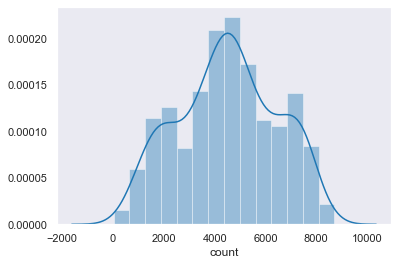

In [14]:
sns.distplot(bikes['count'])

Let's look at the linear realtion of our independent variables with our target variable.

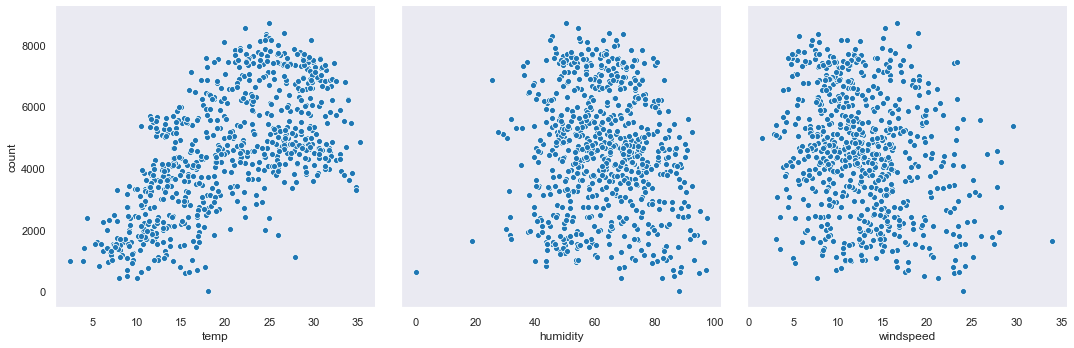

In [15]:
sns.pairplot(data=bikes, x_vars = ['temp', 'humidity', 'windspeed'], y_vars = 'count', kind = 'scatter', height = 5)

- temp has a clear linear relation with the counts data. Number of rental bikes are increasing with increasing temp.

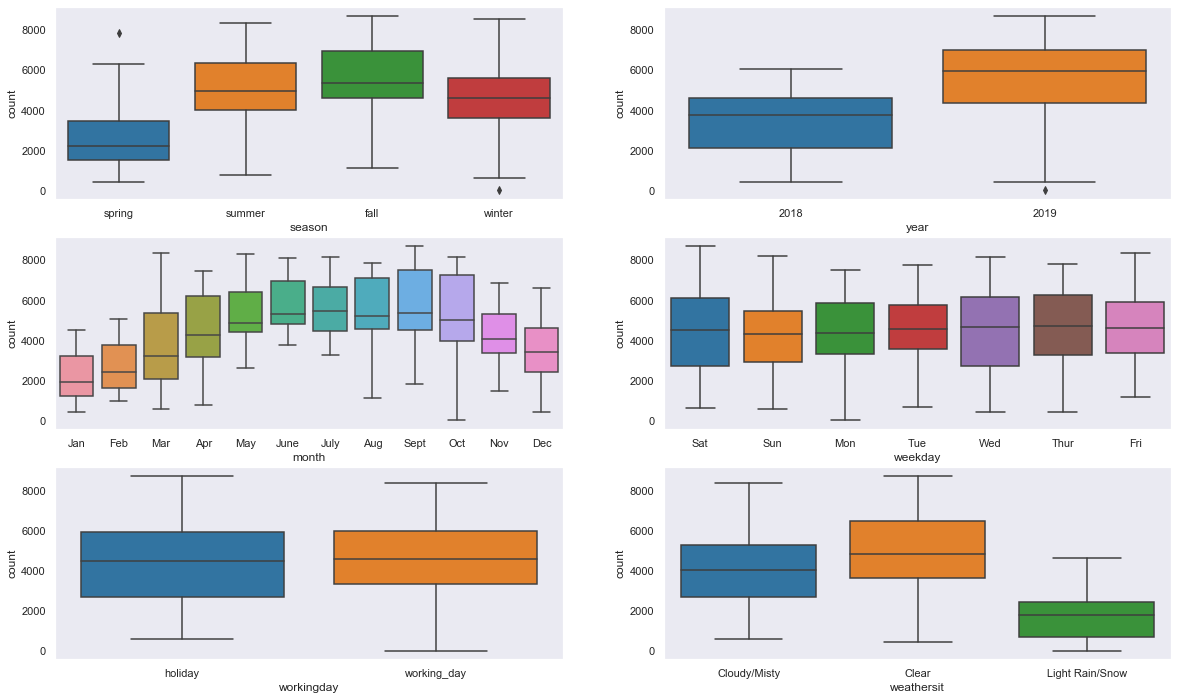

In [16]:
plt.figure(figsize = (20, 12))

plt.subplot(3, 2, 1)
sns.boxplot(x = 'season', y = 'count', data=bikes)

plt.subplot(3, 2, 2)
sns.boxplot(x = 'year', y = 'count', data=bikes)

plt.subplot(3, 2, 3)
sns.boxplot(x = 'month', y = 'count', data=bikes)

plt.subplot(3, 2, 4)
sns.boxplot(x = 'weekday', y = 'count', data=bikes)

plt.subplot(3, 2, 5)
sns.boxplot(x = 'workingday', y = 'count', data=bikes)

plt.subplot(3, 2, 6)
sns.boxplot(x = 'weathersit', y = 'count', data=bikes)

plt.show()

- Number of rental bikes increase when the season is fall or summer an decreases when the season is spring.
- Number of rentals are incresed with the year.
- Number of Retals increase as we go from month Jan --> Oct and decreases after that. Sept and Oct shows highest rentals. We can say that this trend can be explained by the seasons.
- Weekdays don't show clear realtion with rentals, but rentls are high for Sundays and Thursdays.
- Holidays show lower count of rentals than working days.

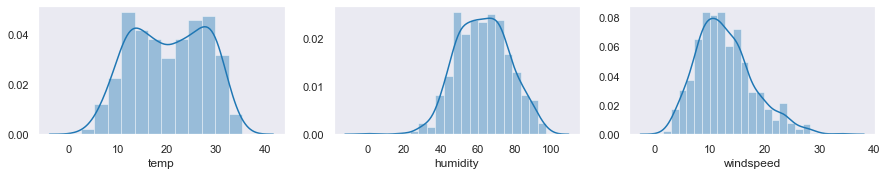

In [17]:
plt.figure(figsize = (15, 8))

plt.subplot(3, 3, 1)
sns.distplot(bikes['temp'])

plt.subplot(3, 3, 2)
sns.distplot(bikes['humidity'])

plt.subplot(3, 3, 3)
sns.distplot(bikes['windspeed'])

plt.show()

- humidity shows a little skewness in data telling the presence of outliers.
- windspeed also is a little skewed, we have some outliers here to train the data with it.

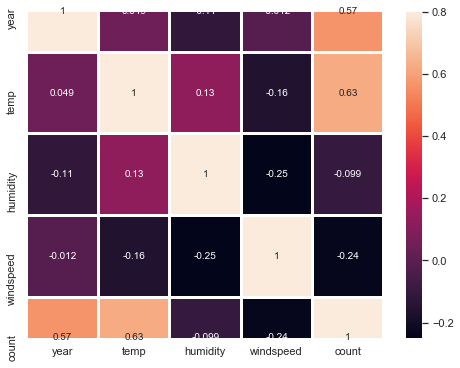

In [18]:
#Let's visualize the correlation with the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.heatmap(bikes.corr(), annot=True, linewidths=2, vmax=0.8)
plt.show()

### Data Preparation

- year and temp are moderately correlated with the count variable

We have some categorical variables, for getting better insights from the data, we will create the dummy variables(n-1) for further analysis.

In [19]:
#creating a dummy variables dataframe, we are using drop_first to achieve n-1 levels
years = pd.get_dummies(bikes['year'], drop_first = True)
seasons = pd.get_dummies(bikes['season'], drop_first = True)
months = pd.get_dummies(bikes['month'], drop_first = True)
weekdays = pd.get_dummies(bikes['weekday'], drop_first = True)
workdays = pd.get_dummies(bikes['workingday'], drop_first = True)
weathersits = pd.get_dummies(bikes['weathersit'], drop_first = True)

#let's concat the dummy variables with our original dataframe, and drop the original columns of categorical variables
bikes = pd.concat([bikes, years, seasons, months, weekdays, workdays, weathersits], axis = 1)
bikes = bikes.drop(columns = ['year', 'season', 'month', 'weekday', 'workingday', 'weathersit'])

In [20]:
#let's see the first 5 rows of our updated dataframe
bikes.head()

,temp,humidity,windspeed,count,2019,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed,working_day,Cloudy/Misty,Light Rain/Snow
0,14.111,80.583,10.750,985,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,14.903,69.609,16.652,801,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,8.051,43.727,16.637,1349,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,8.200,59.044,10.740,1562,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,9.305,43.696,12.522,1600,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [21]:
#columns of the data
bikes.columns

Index(['temp', 'humidity', 'windspeed', 'count', 2019, 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sept', 'Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'Wed', 'working_day', 'Cloudy/Misty', 'Light Rain/Snow'], dtype='object')

In [22]:
#now, let's divide the data for training and testing
np.random.seed(0)

df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 28)
(219, 28)


In [23]:
#We have the numerical variables with different scales than our categorical variables, lets scale them and get all the data at same scale 
num_varlist = ['temp', 'humidity', 'windspeed']

scaler = MinMaxScaler()

df_train[num_varlist] = scaler.fit_transform(df_train[num_varlist])
df_test[num_varlist] = scaler.transform(df_test[num_varlist])

Now, let's prepare the X and y data for both the train and test set.

In [24]:
#training set
y_train = df_train.pop('count')
X_train = df_train

#testing set
y_test = df_test.pop('count')
X_test = df_test

In [25]:
#first 5 values for target train variable
y_train.head()

653    7534
576    7216
426    4066
728    1796
482    4220
Name: count, dtype: int64

In [26]:
#first 5 values for independent train variable
X_train.head()

,temp,humidity,windspeed,2019,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed,working_day,Cloudy/Misty,Light Rain/Snow
653,0.510,0.575,0.301,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
576,0.815,0.726,0.265,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
426,0.442,0.640,0.255,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
728,0.245,0.498,0.663,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
482,0.396,0.505,0.188,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


### Model Building

Let's start creating the model manually with all the independent variables.

In [27]:
#adding the constant to X_train data(intercept)
X_train_sm  = sm.add_constant(X_train)

#building the model
lr = sm.OLS(y_train, X_train_sm)
lr = lr.fit()

In [28]:
#checking the coefficients
lr.params

const              2238.837
temp               3916.282
humidity          -1315.448
windspeed         -1620.652
2019               2017.550
spring             -418.598
summer              336.594
winter              920.021
Aug                 125.199
Dec                -396.233
Feb                -280.593
Jan                -545.654
July               -350.723
June                -25.836
Mar                   9.084
May                 208.086
Nov                -363.772
Oct                  65.482
Sept                704.573
Mon                -181.721
Sat                 751.248
Sun                 277.225
Thur                -80.286
Tue                -164.191
Wed                 -46.828
working_day         755.553
Cloudy/Misty       -530.789
Light Rain/Snow   -2237.693
dtype: float64

In [29]:
#checking the p-value, adj. r2 score and other parameters
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          8.74e-182
Time:                        17:37:30   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     482   BIC:                             8370.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2238.8367    452.044      4.953      0.000    1350.616    3127.058
temp             3916.2822    402.328      9.734      0.000    3125.748    4706.816
humidity        -1315.4477    334.443     -3.933      0.000   -1972.595    -658.301
windspeed       -1620.6522    223.329     -7.257      0.000   -2059.472   -1181.833
2019             2017.5498     70.005     28.820      0.000    1879.997    2155.103
spring           -418.5981    260.478     -1.607      0.109    -930.411      93.215
summer            336.5944    227.730      1.478      0.140    -110.872     784.061
winter            920.0214    242.512      3.794      0.000     443.510    1396.533
Aug               125.1994    292.671      0.428      0.669    -449.870     700.268
Dec              -396.2326    291.836     -1.358      0.175    -969.661     177.195
Feb              -280.5935    285.798     -0.982      0.327    -842.157     280.970
Jan              -545.6541    291.390     -1.873      0.062   -1118.206      26.898
July             -350.7228    304.698     -1.151      0.250    -949.424     247.978
June              -25.8360    217.957     -0.119      0.906    -454.100     402.428
Mar                 9.0845    213.174      0.043      0.966    -409.781     427.950
May               208.0860    182.530      1.140      0.255    -150.567     566.739
Nov              -363.7716    315.893     -1.152      0.250    -984.468     256.925
Oct                65.4819    310.994      0.211      0.833    -545.589     676.553
Sept              704.5726    278.125      2.533      0.012     158.086    1251.059
Mon              -181.7213    133.066     -1.366      0.173    -443.182      79.739
Sat               751.2480    261.738      2.870      0.004     236.959    1265.537
Sun               277.2246    262.425      1.056      0.291    -238.414     792.863
Thur              -80.2858    134.832     -0.595      0.552    -345.217     184.645
Tue              -164.1905    134.665     -1.219      0.223    -428.794     100.413
Wed               -46.8282    129.428     -0.362      0.718    -301.140     207.484
working_day       755.5533    231.133      3.269      0.001     301.401    1209.705
Cloudy/Misty     -530.7891     90.677     -5.854      0.000    -708.961    -352.617
Light Rain/Snow -2237.6927    228.852     -9.778      0.000   -2687.364   -1788.022
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                         39.1
==============================================================================

Warn

Though we got a adj. R2 score of 0.82, we can see there are many variables with high p value than 0.05, making them statistically insignificant for the model.

### RFE

Let's use the Recusive feature elimination and get the 15 columns for building a model.
And then, we will check the p value and VIF d=for further elimination of variables.

In [30]:
#selecting 15 variables using the RFE
lr = LinearRegression()
rfe = RFE(lr, 15, step = 1)
rfe_select = rfe.fit(X_train, y_train)

In [31]:
#let's look at the RFE ranking of different features
rfe_rank = pd.DataFrame({'rank' : rfe_select.ranking_, 'support' : rfe_select.support_, 'features' : X_train.columns}).sort_values(by = 'rank', ascending = True)
rfe_rank

,rank,support,features
0,1,True,temp
24,1,True,working_day
20,1,True,Sun
19,1,True,Sat
17,1,True,Sept
25,1,True,Cloudy/Misty
11,1,True,July
10,1,True,Jan
26,1,True,Light Rain/Snow
4,1,True,spring


In [32]:
#let's get the selected features from RFE and use them for building a model
selected_feat = rfe_rank.loc[rfe_rank['rank'] == 1, 'features'].values
selected_feat

array(['temp', 'working_day', 'Sun', 'Sat', 'Sept', 'Cloudy/Misty',
       'July', 'Jan', 'Light Rain/Snow', 'spring', 'humidity', 'winter',
       'windspeed', 'summer', 2019], dtype=object)

In [33]:
#Let's create the function for building a model and checking it's VIF.
def model(y, X):
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y, X_train_sm).fit()
    print(model.summary())
    return model

def vif(X):
    data = sm.add_constant(X)
    vif = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif = pd.DataFrame({'vif' : vif[0:]}, index = data.columns).reset_index()
    print(vif.sort_values(by = 'vif', ascending = False))
    

#### Model 1 

In [34]:
feat1 = selected_feat
model(y_train, X_train[feat1])
vif(X_train[feat1])

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.31e-191
Time:                        17:37:30   Log-Likelihood:                -4105.9
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1695.3174    368.826     

- The VIF for ````working_day```` is 9.07, so let's drop it and build another model.

### Model 2

In [35]:
feat2 = feat1[feat1 != 'working_day']
model(y_train, X_train[feat2])
vif(X_train[feat2])

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.7
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          4.75e-189
Time:                        17:37:30   Log-Likelihood:                -4114.2
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     495   BIC:                             8322.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2560.2524    304.738     

- The p-value for ````Sat```` > 0.05, let's drop it and build another model

### Model 3

In [36]:
feat3 = feat2[feat2 != 'Sat']
model(y_train, X_train[feat3])
vif(X_train[feat3])

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          7.11e-190
Time:                        17:37:30   Log-Likelihood:                -4115.0
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     496   BIC:                             8317.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2591.2522    303.910     

- The VIF for ````spring```` is just greater than 5, let's drop it and build another model.

### Model 4

In [37]:
feat4 = feat3[feat3 != 'spring']
model(y_train, X_train[feat4])
vif(X_train[feat4])

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.2
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.14e-189
Time:                        17:37:30   Log-Likelihood:                -4118.3
No. Observations:                 510   AIC:                             8263.
Df Residuals:                     497   BIC:                             8318.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2132.2616    245.531     

We have the model with 0.84 R2 score and 0.83 adj. R2 score and all the features have p value less than 0.05 an dthe VIF less than 5.
We can infer that, model do not have any multicollinearity between the independent variables and all the variables are statistically significant.
We can treat it as the final model.

### Final Model 

In [38]:
X_train = X_train[feat4]
X_train_sm = sm.add_constant(X_train)
final_model = model(y_train, X_train)
y_train_pred = final_model.predict(X_train_sm)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.2
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.14e-189
Time:                        17:37:31   Log-Likelihood:                -4118.3
No. Observations:                 510   AIC:                             8263.
Df Residuals:                     497   BIC:                             8318.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2132.2616    245.531     

### Residual Analysis
- Let's see if the error terms are normally distributed
- If error terms show any trends

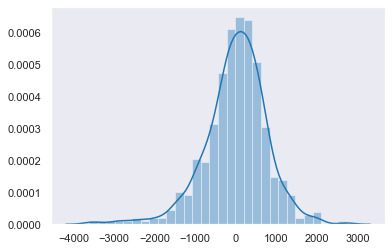

In [39]:
#checking if error terms are normally distributed 
sns.distplot(y_train - y_train_pred, bins = 30)

- Residual errors follow a normal distribution with the mean 0.

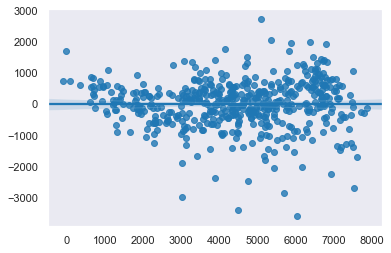

In [40]:
#checking for any trends in the error terms
sns.regplot(y_train_pred, y_train - y_train_pred)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


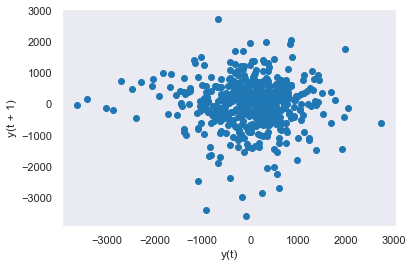

In [41]:
lag_plot(y_train - y_train_pred)

- We can infer that, there is no trend in the variance of error terms.

__Assumptions of Linear Regression are satisfied by our model__

### Prediction

In [42]:
#predicting values of the test data using our final model
X_test = X_test[feat4]
X_test = sm.add_constant(X_test)
y_test_pred = final_model.predict(X_test)

### Model Evaluation

Text(0, 0.5, 'No. of Bike Rentals')

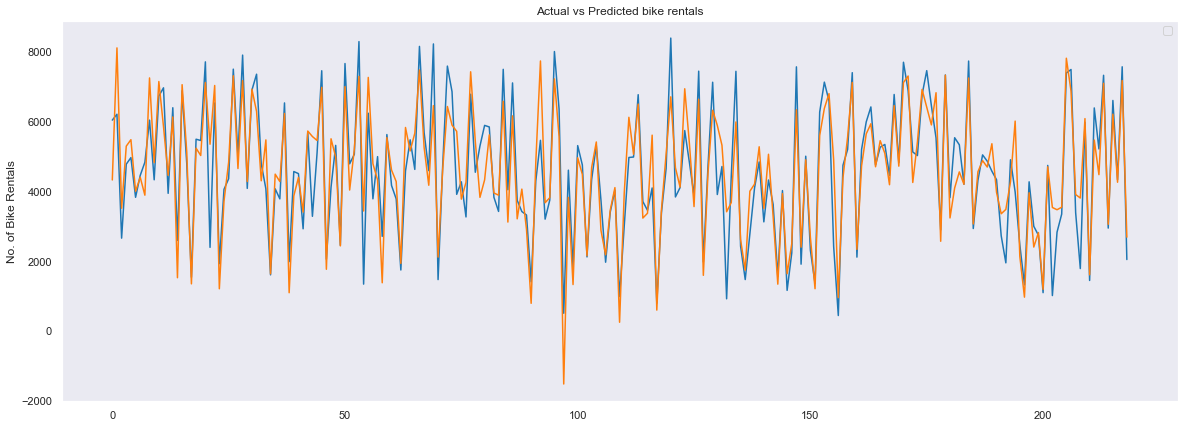

In [43]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(20)
p1 = ax.plot(range(len(y_test)), y_test)
p2 = ax.plot(range(len(y_test_pred)), y_test_pred)
plt.legend([p1, p2], ['Actual', 'Predicted'])
plt.title('Actual vs Predicted bike rentals')
plt.ylabel('No. of Bike Rentals')

- We can infer that, our model is doing pretty well from the above plot. We can say thay, our model is reasonably accurate.

In [44]:
mse = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Mean squared error of the model is ", round(mse, 3))
print("R2 score for the train data is ", round(r2_train, 3))
print("R2 score for the test data is ", round(r2_test, 3))

Mean squared error of the model is  711067.401
R2 score for the train data is  0.841
R2 score for the test data is  0.802


In [45]:
r2_score(y_test, y_test_pred)

0.8018399735317556

Using the cross val score to check the stability of the model.

In [46]:
clr = cross_val_score(lr, X_train[feat4], y_train, cv = 10, scoring = 'r2')
clr

array([0.76304387, 0.80312159, 0.85001041, 0.83798497, 0.80587498,
       0.81622414, 0.74250756, 0.90144626, 0.86878611, 0.84664323])

In [47]:
clr.mean(), clr.std() * 2

(0.8235643123281378, 0.0907043830920422)

- We can say that, our model will explain the 82%(+/-0.09) variance in the data.

In [48]:
final_model.params.sort_values()

Light Rain/Snow   -2075.683
windspeed         -1694.925
humidity          -1455.884
Cloudy/Misty       -461.772
July               -372.446
Sun                -368.222
Jan                -348.112
summer              661.138
Sept                778.666
winter             1090.801
2019               1994.410
const              2132.262
temp               4963.951
dtype: float64

- We have normalized the continuous variables and all the categorical variables are now the dummy variables with level (n-1), so we have the scale of minimum=0, maximum=1 for all the variables.
- Upon normalizing the values of the predictor variables i.e. the independent variables, from the above chart, we can say that features influencing the number of rental bikes are ````temp````, ````2019```` and ````Light Snow/Rain```` followed by ````windspeed```` and ````humidity````.
- The demand of bikes rises significantly with the rising temperature, if the year is 2019 and decreases when the weather is little snowy or rainy or windspeed rises.

### Conclusion

We carried out this Multiple Linear Regression model using the mixed approach. We first created the model with manually selecting all the independent variables. There we encountered the high p values, so we then used the RFE(Recursive Feature Elimination) method to select the top 15 features from our bikes data. Further we built the model with those selected features. We checked for the p values and VIFs for independent variables, all the p values were less than 0.05 and VIFs less than 5. 
After that, we built the final model with those 15 features and it explains the 84% variance of the training data and 80% variance of the testing data.

The final model shows the following relationship between the predictor and target variable : 

````count```` = 2132.262 - 2075.683````Light Rain/Snow```` - 1455.884````humidity```` - 1694.925````windspeed```` - 348.112````Jan```` - 372.446````July```` - 368.222````Sun```` - 461.772````Cloudy/Misty```` + 661.138````summer```` + 373.288````May```` + 778.666````Sept```` + 1090.801````winter```` +  1994.410````2019```` + 4963.951````temp````
